# **Analisis Inventory Item**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

sns.set_theme(style="whitegrid")

In [2]:
uploaded = files.upload()

for fn in uploaded.keys():
  nama_file_csv = fn
  print(f"\n File '{nama_file_csv}' berhasil diunggah.")

Saving inventory_items.csv to inventory_items.csv

 File 'inventory_items.csv' berhasil diunggah.


## **Langkah 2: Memuat dan Menginspeksi Data Awal**

Data sudah ada di lingkungan Colab. Sekarang, kita akan memuatnya ke dalam struktur data yang disebut **DataFrame** menggunakan library Pandas. Ini memungkinkan kita untuk melihat, menganalisis, dan memanipulasi data dengan mudah.

Kita juga akan langsung membuat **salinan data**. Semua proses pembersihan akan dilakukan pada salinan ini, sehingga data asli yang Anda unggah tetap aman dan tidak berubah.

In [3]:
df_raw = pd.read_csv('/content/inventory_items.csv')

df_clean = df_raw.copy()

print("Data berhasil dimuat ke DataFrame.")
print("DataFrame asli bernama 'df_raw'.")
print("DataFrame yang akan kita bersihkan bernama 'df_clean'.")

Data berhasil dimuat ke DataFrame.
DataFrame asli bernama 'df_raw'.
DataFrame yang akan kita bersihkan bernama 'df_clean'.


In [4]:
print("--- 5 Baris Pertama Data ---")
display(df_clean.head())

print("\n\n--- Informasi Kolom, Tipe Data, dan Nilai Non-Null ---")
df_clean.info()

print("\n\n--- Ringkasan Jumlah Data yang Hilang (Missing Values) ---")
# .isnull().sum() akan menghitung semua nilai kosong di setiap kolom
print(df_clean.isnull().sum())

print(f"\n\n--- Ukuran Dataset Awal ---")
print(f"Jumlah baris: {df_clean.shape[0]}")
print(f"Jumlah kolom: {df_clean.shape[1]}")

--- 5 Baris Pertama Data ---


,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7




--- Informasi Kolom, Tipe Data, dan Nilai Non-Null ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490705 entries, 0 to 490704
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              490705 non-null  int64  
 1   product_id                      490705 non-null  int64  
 2   created_at                      490705 non-null  object 
 3   sold_at                         181759 non-null  object 
 4   cost                            490705 non-null  float64
 5   product_category                490705 non-null  object 
 6   product_name                    490676 non-null  object 
 7   product_brand                   490304 non-null  object 
 8   product_retail_price            490705 non-null  float64
 9   product_department              490705 non-null  object 
 10  product_sku                     490705 non-null  object 
 11  product_distribution_

## **Langkah 3: Data Wrangling (Proses Pembersihan Data)**

Berdasarkan hasil inspeksi, kita menemukan beberapa hal yang perlu diperbaiki. Di tahap ini, kita akan membersihkan data agar akurat dan siap untuk dianalisis. Kita akan fokus pada dua hal utama:
1. Menangani data yang hilang (*missing values*).
2. Memperbaiki tipe data yang tidak sesuai.

### Menanagani tipe data yang hilang (Missing value)

In [5]:
# Mengisi missing values untuk kolom product_name dengan nilai yang paling sering muncul (modus)
if df_clean['product_name'].isnull().any():
    mode_name = df_clean['product_name'].mode()[0]
    df_clean['product_name'].fillna(mode_name, inplace=True)
    print(f"Missing values di 'product_name' diisi dengan modus: '{mode_name}'")

# Mengisi missing values untuk kolom product_brand dengan modus
if df_clean['product_brand'].isnull().any():
    mode_brand = df_clean['product_brand'].mode()[0]
    df_clean['product_brand'].fillna(mode_brand, inplace=True)
    print(f"Missing values di 'product_brand' diisi dengan modus: '{mode_brand}'")

print("Penanganan missing values selesai.")

Missing values di 'product_name' diisi dengan modus: 'Wrangler Men's Premium Performance Cowboy Cut Jean'
Missing values di 'product_brand' diisi dengan modus: 'Allegra K'
Penanganan missing values selesai.


<ipython-input-5-952760560>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['product_name'].fillna(mode_name, inplace=True)
<ipython-input-5-952760560>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

### Memperbaiki Tipe Data

In [6]:
# Mengubah kolom tanggal dari object menjadi datetime
df_clean['created_at'] = pd.to_datetime(df_clean['created_at'], errors='coerce')
df_clean['sold_at'] = pd.to_datetime(df_clean['sold_at'], errors='coerce')
print("Kolom 'created_at' dan 'sold_at' telah diubah menjadi tipe datetime.")

# Mengubah kolom ID dari integer menjadi object (teks)
id_columns = ['id', 'product_id', 'product_distribution_center_id']
for col in id_columns:
    df_clean[col] = df_clean[col].astype(str)
print(f"Kolom ID ({', '.join(id_columns)}) telah diubah menjadi tipe object.")

Kolom 'created_at' dan 'sold_at' telah diubah menjadi tipe datetime.
Kolom ID (id, product_id, product_distribution_center_id) telah diubah menjadi tipe object.


In [7]:
print("--- Pengecekan Ulang Setelah Cleaning dan Perbaikan Tipe Data ---")
df_clean.info()

--- Pengecekan Ulang Setelah Cleaning dan Perbaikan Tipe Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490705 entries, 0 to 490704
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype              
---  ------                          --------------   -----              
 0   id                              490705 non-null  object             
 1   product_id                      490705 non-null  object             
 2   created_at                      486300 non-null  datetime64[ns, UTC]
 3   sold_at                         177354 non-null  datetime64[ns, UTC]
 4   cost                            490705 non-null  float64            
 5   product_category                490705 non-null  object             
 6   product_name                    490705 non-null  object             
 7   product_brand                   490705 non-null  object             
 8   product_retail_price            490705 non-null  float64            
 9   prod

### Menangani Data Duplikat

Data duplikat adalah baris-baris data yang identik satu sama lain. Ini bisa terjadi karena kesalahan input atau masalah teknis di sistem. Kehadiran data duplikat bisa mengacaukan perhitungan statistik (misalnya, total penjualan jadi lebih tinggi dari seharusnya) dan membuat model kita jadi bias.

Oleh karena itu, kita perlu mendeteksi dan menghapusnya.

In [8]:
# hitung ada berapa banyak baris yang sama persis
duplicate_rows = df_clean.duplicated().sum()
print(f"Jumlah baris duplikat yang terdeteksi: {duplicate_rows} baris.")

# Kalo ada (lebih dari 0), kita langsung sikat bersih!
if duplicate_rows > 0:
    # .drop_duplicates(inplace=True) akan menghapus baris duplikat secara permanen di df_clean
    df_clean.drop_duplicates(inplace=True)
    print(f"sebanyak {duplicate_rows} baris duplikat berhasil dihapus.")
    print(f"Ukuran data sekarang menjadi: {df_clean.shape[0]} baris.")
else:
    # Kalo gak ada, ya bagus, kerjaan jadi lebih ringan
    print("Tidak ada data duplikat di dataset ini.")

Jumlah baris duplikat yang terdeteksi: 0 baris.
Tidak ada data duplikat di dataset ini.


## **Langkah 4: Exploratory Data Analysis (EDA) - Saatnya Menggali Harta Karun!**

Proses cleaning sudah selesai! Sekarang data kita sudah rapi dan terpercaya. Inilah saatnya kita masuk ke bagian paling seru: **Exploratory Data Analysis** atau **EDA**.

Di tahap ini, kita akan menjadi detektif data. Tujuannya adalah untuk "kepo-in" data kita, memahami karakteristiknya, menemukan pola, anomali, dan mendapatkan wawasan awal sebelum menjawab pertanyaan bisnis yang lebih spesifik.

### Statistik Deskriptif Keseluruhan

In [9]:
print("--- Ringkasan Statistik dari Data yang Sudah Bersih ---")

display(df_clean.describe(include='all'))

--- Ringkasan Statistik dari Data yang Sudah Bersih ---


,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
count,490705,490705,486300,177354,490705.000000,490705,490705,490705,490705.000000,490705,490705,490705
unique,490705,29046,NaN,NaN,NaN,26,27236,2752,NaN,2,29046,10
top,486058,18795,NaN,NaN,NaN,Intimates,Wrangler Men's Premium Performance Cowboy Cut ...,Allegra K,NaN,Women,6B45CF467A9C88001159A826E92C7437,1
freq,1,58,NaN,NaN,NaN,36353,190,17420,NaN,245625,58,65116
mean,NaN,NaN,2022-04-09 08:03:45.924835072+00:00,2022-10-13 14:21:31.169790464+00:00,28.658986,NaN,NaN,NaN,59.569440,NaN,NaN,NaN
min,NaN,NaN,2018-11-08 04:14:18+00:00,2019-01-06 02:25:41+00:00,0.008300,NaN,NaN,NaN,0.020000,NaN,NaN,NaN
25%,NaN,NaN,2021-04-12 15:47:45+00:00,2022-02-12 00:06:55.500000+00:00,11.368000,NaN,NaN,NaN,24.500000,NaN,NaN,NaN
50%,NaN,NaN,2022-06-01 14:52:30+00:00,2023-02-07 09:59:02+00:00,19.832000,NaN,NaN,NaN,39.990002,NaN,NaN,NaN
75%,NaN,NaN,2023-05-05 02:53:59.500000+00:00,2023-09-14 05:26:04.249999872+00:00,34.550301,NaN,NaN,NaN,69.949997,NaN,NaN,NaN
max,NaN,NaN,2024-01-19 21:41:42+00:00,2024-01-21 16:18:30+00:00,557.151002,NaN,NaN,NaN,999.000000,NaN,NaN,NaN


### 4.2 Analisis Univariat - Membedah Tiap Kolom

Sekarang kita akan melihat setiap variabel secara individual untuk memahami distribusinya.
- Untuk data numerik, kita ingin tahu bagaimana sebaran nilainya. Apakah menumpuk di nilai rendah? Atau tersebar merata?
- Untuk data kategorikal, kita ingin tahu seberapa sering setiap kategori muncul. Kategori mana yang paling dominan?

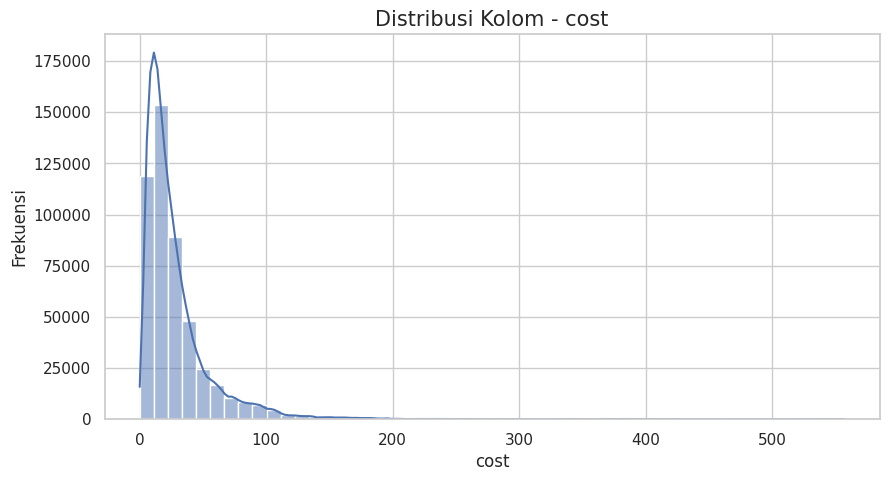

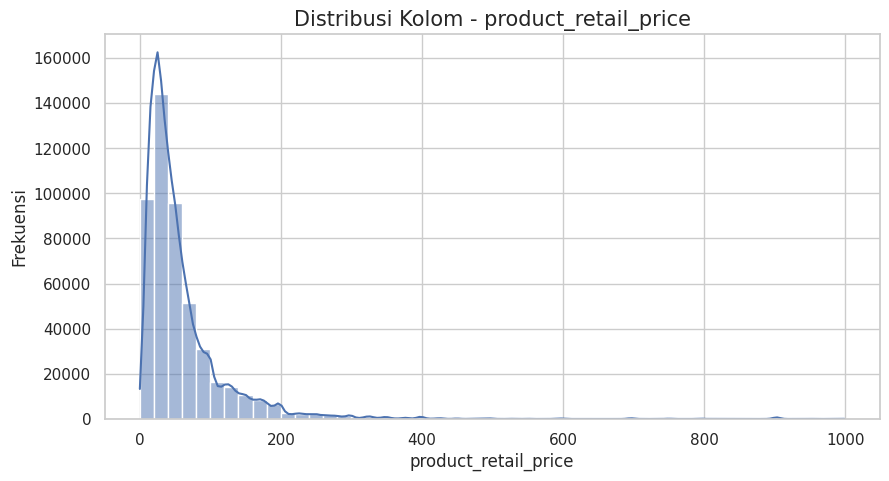

In [10]:
# Ambil semua kolom numerik dari data bersih kita
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

# Buat plot histogram untuk setiap kolom numerik
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_clean[col], bins=50, kde=True)
    plt.title(f'Distribusi Kolom - {col}', fontsize=15)
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

<ipython-input-11-3205888604>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')


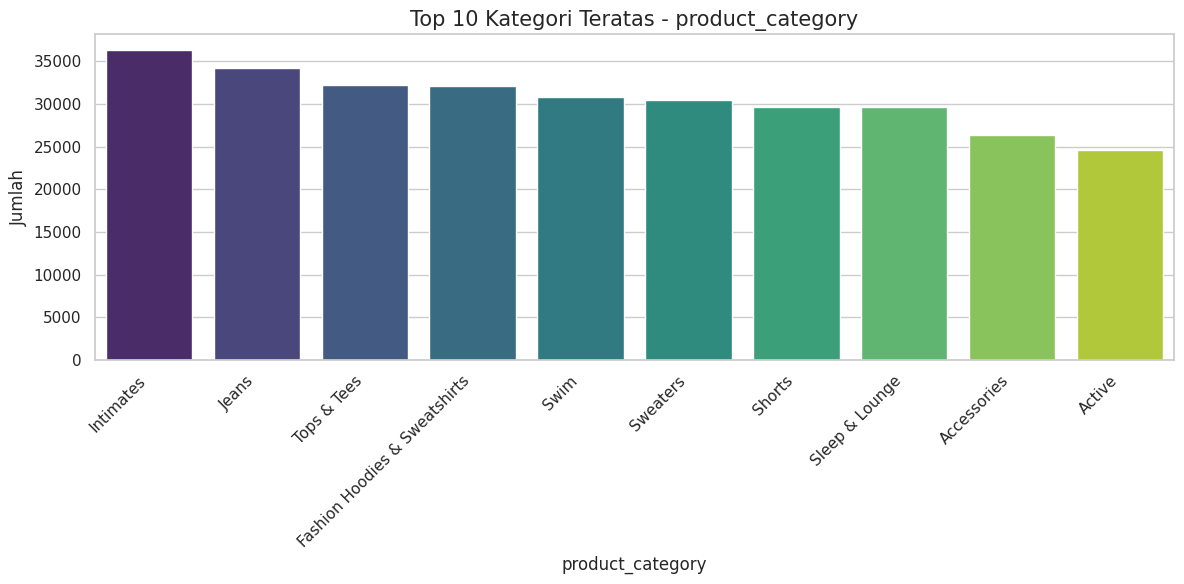

<ipython-input-11-3205888604>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')


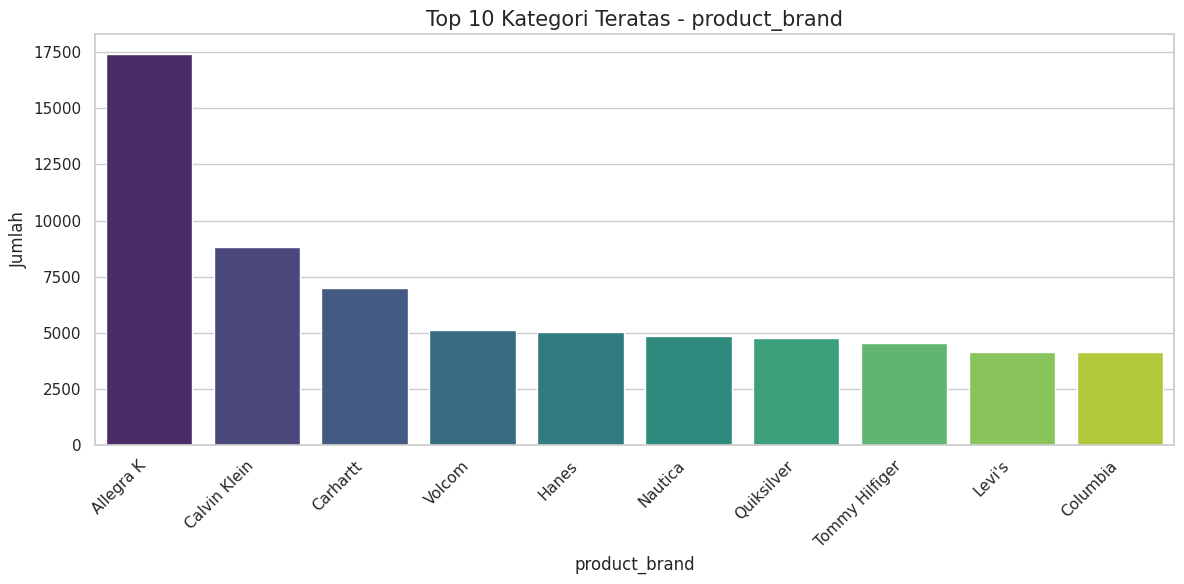

<ipython-input-11-3205888604>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')


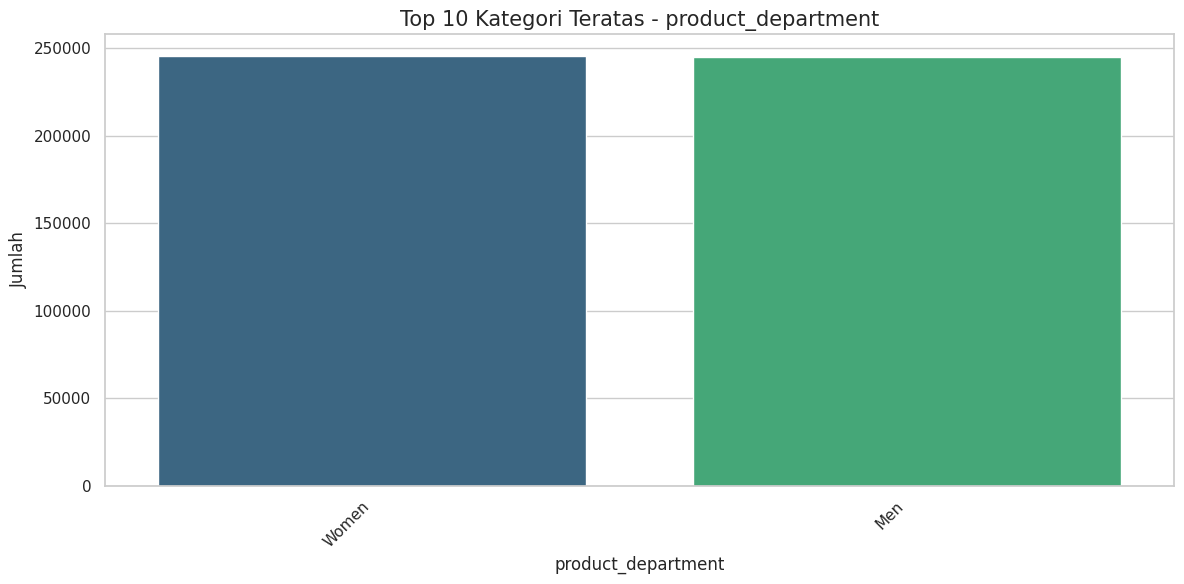

In [11]:
# Kami pilih beberapa kolom kategorikal yang paling menarik
categorical_cols_to_plot = ['product_category', 'product_brand', 'product_department']

for col in categorical_cols_to_plot:
    plt.figure(figsize=(12, 6))
    # Kami ambil 10 kategori teratas aja biar plotnya gak terlalu ramai
    top_10 = df_clean[col].value_counts().nlargest(10)
    sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')
    plt.title(f'Top 10 Kategori Teratas - {col}', fontsize=15)
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## **Langkah 5: Analisis Mendalam & Menjawab Pertanyaan Bisnis**

Setelah memahami karakteristik dasar setiap kolom, sekarang saatnya kita menghubungkan titik-titik. Kita akan merumuskan pertanyaan spesifik dan mencoba menjawabnya dengan membuat visualisasi yang relevan. Ini adalah inti dari proses untuk menghasilkan wawasan (insight).

Di tahap ini, kita juga mungkin akan melakukan **Feature Engineering**, yaitu membuat kolom baru dari kolom yang sudah ada untuk analisis yang lebih dalam.

### 5.1 Analisis Profitabilitas per Kategori Produk

**Pertanyaan:** Kategori produk mana yang secara total menghasilkan keuntungan (profit) paling besar?

**Langkah-langkah:**
1.  **Feature Engineering:** Membuat kolom baru `profit` yang dihitung dari `product_retail_price` - `cost`.
2.  **Grouping & Aggregation:** Mengelompokkan data berdasarkan `product_category` dan menjumlahkan total profit untuk setiap kategori.
3.  **Visualisasi:** Menampilkan hasilnya dalam bentuk bar plot untuk melihat perbandingan dengan jelas.

Jumlah produk terjual dengan profit negatif (rugi): 0 item.

--- Top 10 Kategori Paling Menguntungkan (Berdasarkan Total Profit) ---
product_category
Outerwear & Coats                702974.941838
Jeans                            569210.654797
Sweaters                         426804.192796
Suits & Sport Coats              385514.664680
Swim                             308442.078455
Fashion Hoodies & Sweatshirts    304906.049440
Sleep & Lounge                   269787.166235
Active                           263956.326034
Shorts                           249964.268780
Dresses                          248729.950810
Name: profit, dtype: float64


<ipython-input-12-3124810425>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_profit.index, y=category_profit.values, palette='magma')


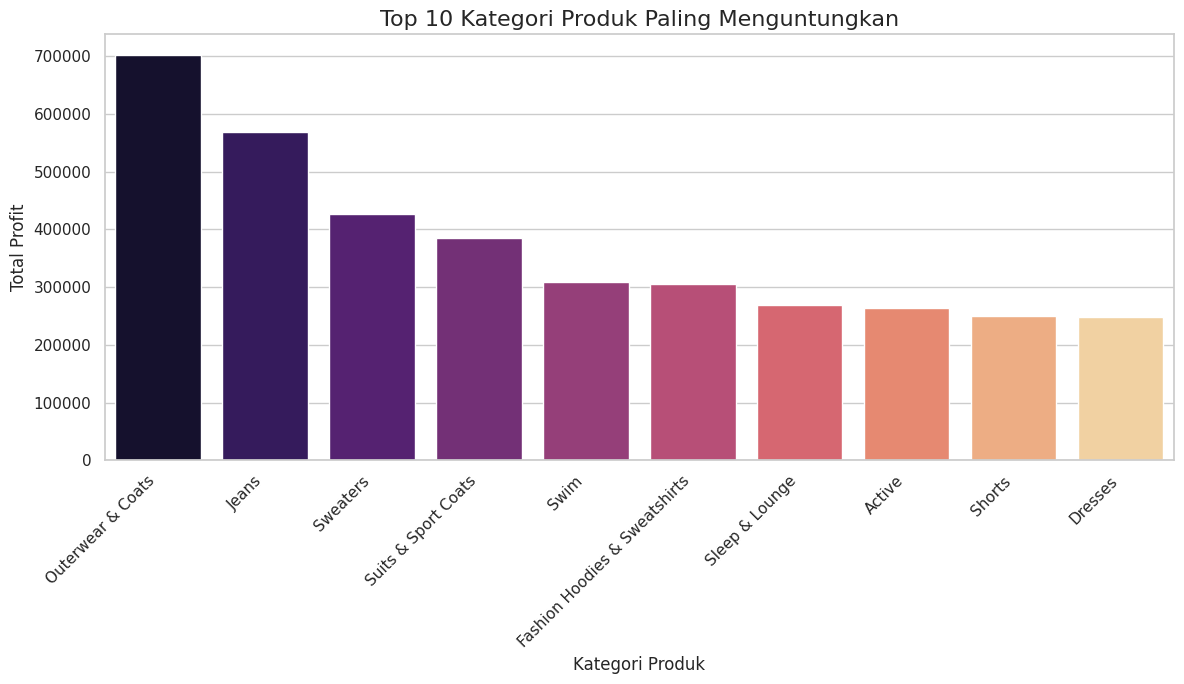

In [12]:
# Langkah 1: Feature Engineering - Membuat kolom 'profit'
# Kita hanya hitung profit untuk produk yang sudah terjual
# Caranya, kami filter dulu data yang kolom 'sold_at'-nya tidak kosong
sold_items_df = df_clean[df_clean['sold_at'].notna()].copy()

sold_items_df['profit'] = sold_items_df['product_retail_price'] - sold_items_df['cost']

# Cek singkat, apakah ada profit yang negatif (ini bisa jadi indikasi data aneh)
negative_profit_count = (sold_items_df['profit'] < 0).sum()
print(f"Jumlah produk terjual dengan profit negatif (rugi): {negative_profit_count} item.")

# Langkah 2: Grouping & Aggregation
# Kami kelompokkan berdasarkan kategori, lalu jumlahkan profitnya.
# Kami pakai .sum() untuk melihat total kontribusi profit, bukan rata-rata.
category_profit = sold_items_df.groupby('product_category')['profit'].sum().sort_values(ascending=False).nlargest(10)

print("\n--- Top 10 Kategori Paling Menguntungkan (Berdasarkan Total Profit) ---")
print(category_profit)


# Langkah 3: Visualisasi
plt.figure(figsize=(12, 7))
sns.barplot(x=category_profit.index, y=category_profit.values, palette='magma')
plt.title('Top 10 Kategori Produk Paling Menguntungkan', fontsize=16)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **5.2 Analisis Siklus Penjualan per Kategori**

**Pertanyaan:** Kategori produk mana yang memiliki perputaran (turnover) paling cepat?

**Langkah-langkah:**
1.  **Feature Engineering:** Membuat kolom baru `days_to_sell` dari selisih `sold_at` dan `created_at`.
2.  **Grouping & Aggregation:** Mengelompokkan data berdasarkan `product_category` dan menghitung **rata-rata** `days_to_sell`.
3.  **Visualisasi:** Menampilkan hasilnya dalam bar plot untuk melihat kategori mana yang produknya paling cepat laku.

Jumlah produk dengan 'days_to_sell' negatif: 0

--- Top 10 Kategori dengan Perputaran Tercepat (Rata-rata Hari untuk Terjual) ---
product_category
Clothing Sets                    27.721154
Skirts                           28.806857
Leggings                         29.071383
Sleep & Lounge                   29.098546
Fashion Hoodies & Sweatshirts    29.257264
Active                           29.327140
Blazers & Jackets                29.336413
Outerwear & Coats                29.350618
Pants                            29.357043
Dresses                          29.365515
Name: days_to_sell, dtype: float64


<ipython-input-13-3141968050>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fastest_turnover.index, y=fastest_turnover.values, palette='plasma')


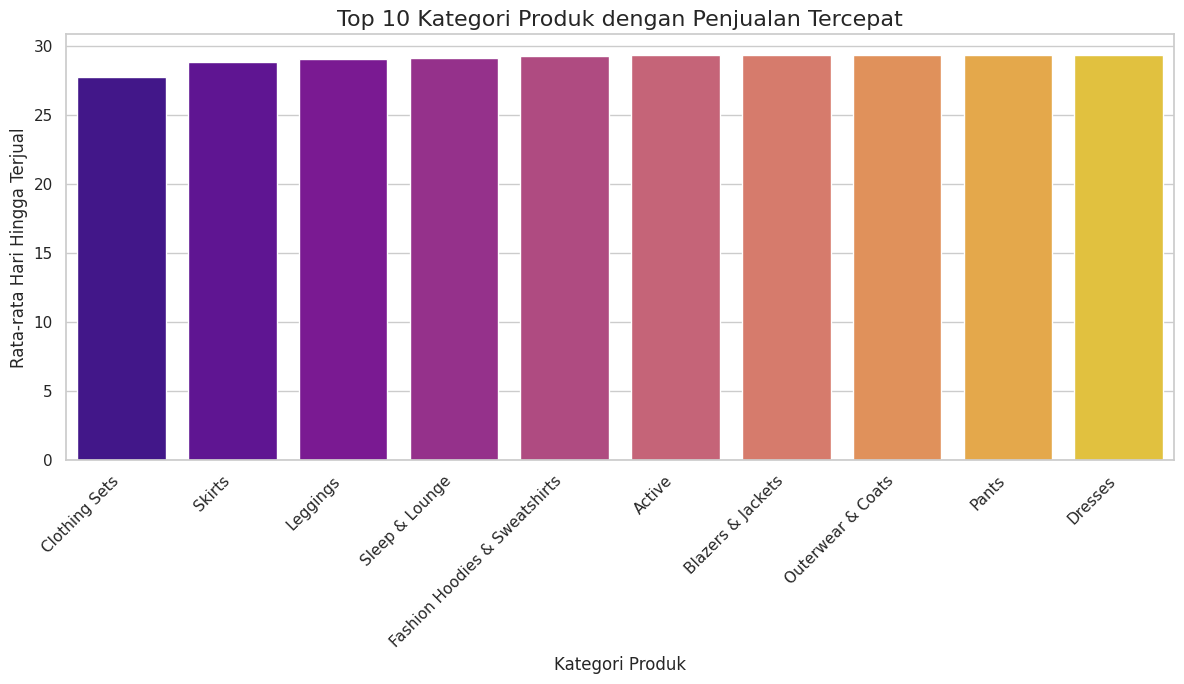

In [13]:
# Langkah 1: Feature Engineering - Membuat kolom 'days_to_sell'
# Kami masih menggunakan 'sold_items_df' dari langkah sebelumnya yang sudah difilter

# Hitung selisih waktu
time_to_sell = sold_items_df['sold_at'] - sold_items_df['created_at']

# Ambil hanya komponen harinya dan ubah menjadi angka
sold_items_df['days_to_sell'] = time_to_sell.dt.days

# Cek singkat, apakah ada nilai aneh (negatif)
print(f"Jumlah produk dengan 'days_to_sell' negatif: {(sold_items_df['days_to_sell'] < 0).sum()}")


# Langkah 2: Grouping & Aggregation
# Kami kelompokkan berdasarkan kategori, lalu hitung RATA-RATA lama penjualan
# Kami urutkan dari yang terkecil (paling cepat laku)
fastest_turnover = sold_items_df.groupby('product_category')['days_to_sell'].mean().sort_values(ascending=True).nsmallest(10)

print("\n--- Top 10 Kategori dengan Perputaran Tercepat (Rata-rata Hari untuk Terjual) ---")
print(fastest_turnover)


# Langkah 3: Visualisasi
plt.figure(figsize=(12, 7))
sns.barplot(x=fastest_turnover.index, y=fastest_turnover.values, palette='plasma')
plt.title('Top 10 Kategori Produk dengan Penjualan Tercepat', fontsize=16)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Rata-rata Hari Hingga Terjual', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **5.3 Analisis Performa Merek (Brand Performance)**

**Pertanyaan:** Merek mana yang paling laris (terjual paling banyak) dan merek mana yang menyumbang profit terbesar? Apakah keduanya sama?

**Langkah-langkah:**
1.  **Analisis Kuantitas:** Mengelompokkan produk yang terjual berdasarkan `product_brand` dan menghitung jumlah transaksi (kuantitas penjualan).
2.  **Analisis Profitabilitas:** Mengelompokkan produk yang terjual berdasarkan `product_brand` dan menghitung total profit.
3.  **Visualisasi Perbandingan:** Menampilkan kedua hasil dalam dua plot berdampingan untuk membandingkan secara langsung antara "Paling Laris" dan "Paling Profitabel".

<ipython-input-14-1305248761>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=top_10_laris.index, y=top_10_laris.values, palette='coolwarm')
<ipython-input-14-1305248761>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=top_10_profit_brand.index, y=top_10_profit_brand.values, palette='Greens_r')


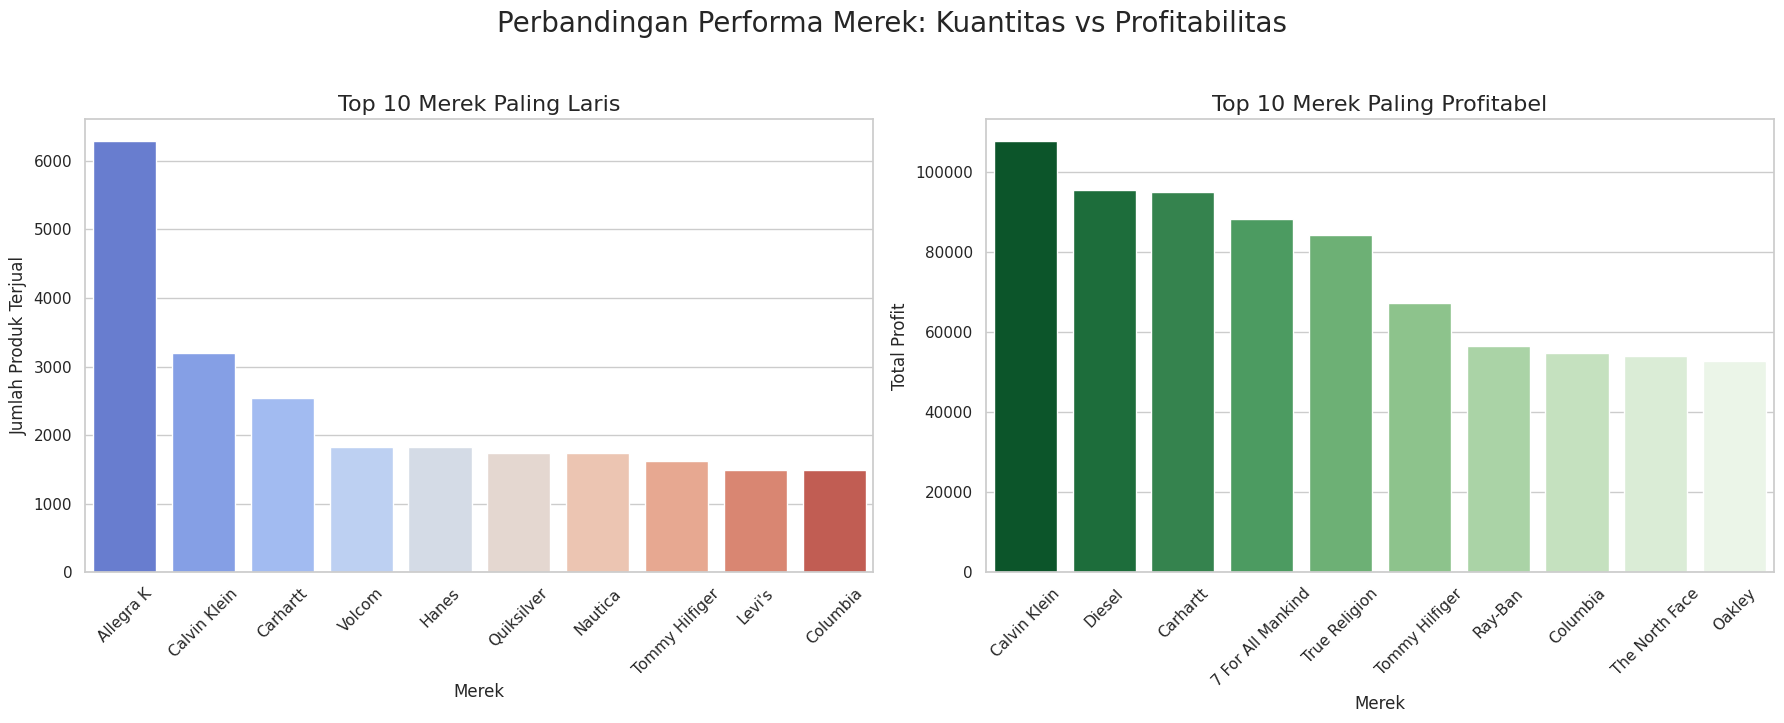

In [14]:
# Kami masih menggunakan 'sold_items_df' yang berisi produk terjual

# Analisis 1: Merek Paling Laris (berdasarkan jumlah item terjual)
top_10_laris = sold_items_df.groupby('product_brand').size().sort_values(ascending=False).nlargest(10)

# Analisis 2: Merek Paling Profitabel (berdasarkan total profit)
top_10_profit_brand = sold_items_df.groupby('product_brand')['profit'].sum().sort_values(ascending=False).nlargest(10)


# Visualisasi Perbandingan
# Membuat 2 panel plot (1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Top 10 Merek Paling Laris
sns.barplot(ax=axes[0], x=top_10_laris.index, y=top_10_laris.values, palette='coolwarm')
axes[0].set_title('Top 10 Merek Paling Laris', fontsize=16)
axes[0].set_xlabel('Merek', fontsize=12)
axes[0].set_ylabel('Jumlah Produk Terjual', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Top 10 Merek Paling Profitabel
sns.barplot(ax=axes[1], x=top_10_profit_brand.index, y=top_10_profit_brand.values, palette='Greens_r')
axes[1].set_title('Top 10 Merek Paling Profitabel', fontsize=16)
axes[1].set_xlabel('Merek', fontsize=12)
axes[1].set_ylabel('Total Profit', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Judul utama untuk kedua plot
plt.suptitle('Perbandingan Performa Merek: Kuantitas vs Profitabilitas', fontsize=20, y=1.03)
plt.tight_layout()
plt.show()

### **5.4 Analisis Tren Penjualan Bulanan**

**Pertanyaan:** Bagaimana pola penjualan (berdasarkan jumlah transaksi) dari bulan ke bulan?

**Langkah-langkah:**
1.  **Feature Engineering:** Membuat kolom baru `sale_month` yang berisi informasi tahun dan bulan dari setiap transaksi.
2.  **Grouping & Aggregation:** Mengelompokkan data berdasarkan `sale_month` dan menghitung jumlah transaksi setiap bulannya.
3.  **Visualisasi:** Menampilkan hasilnya dalam bentuk **line plot** untuk melihat tren, kenaikan, dan penurunan seiring berjalannya waktu.

<ipython-input-15-2675039506>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  sold_items_df['sale_month'] = sold_items_df['sold_at'].dt.to_period('M')


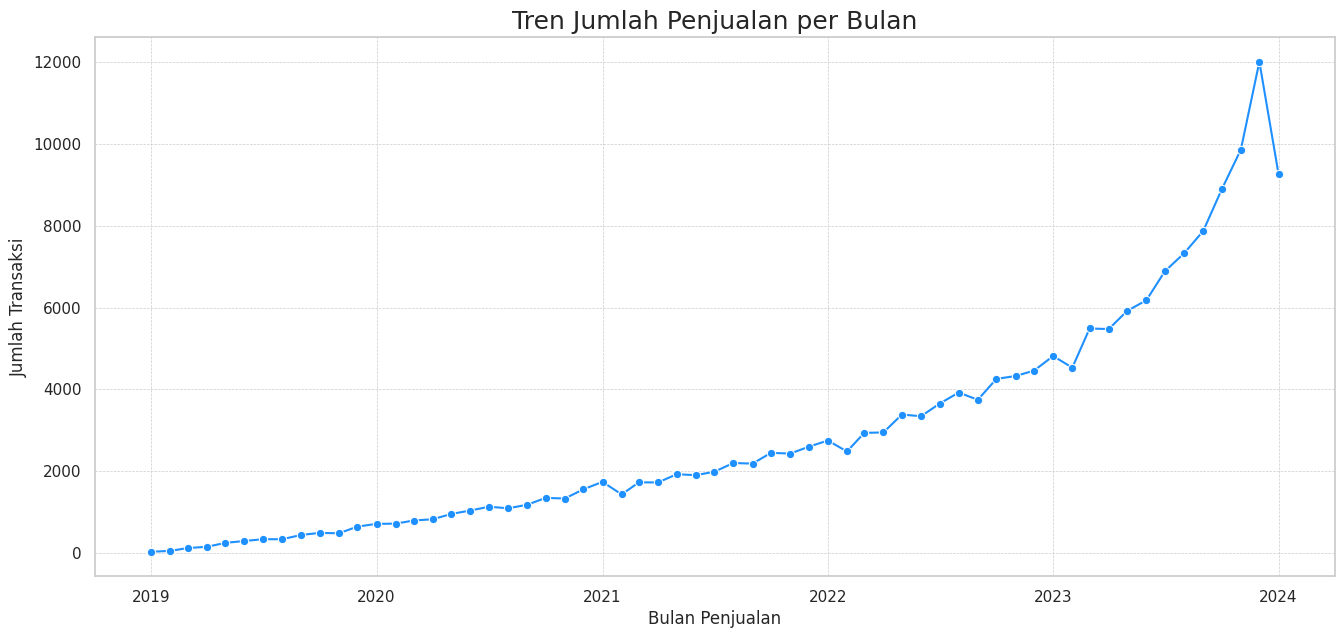

In [15]:
# Kami masih menggunakan 'sold_items_df'

# Langkah 1: Feature Engineering - Membuat kolom periode Tahun-Bulan
# .dt.to_period('M') adalah cara canggih untuk mengelompokkan tanggal ke periode bulan
sold_items_df['sale_month'] = sold_items_df['sold_at'].dt.to_period('M')

# Langkah 2: Grouping & Aggregation
# Kami kelompokkan berdasarkan bulan penjualan, lalu hitung jumlah transaksinya
monthly_sales = sold_items_df.groupby('sale_month').size()

# Mengubah index (yang tadinya periode) menjadi string agar mudah di-plot
monthly_sales.index = monthly_sales.index.to_timestamp()


# Langkah 3: Visualisasi dengan Line Plot
plt.figure(figsize=(16, 7))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='dodgerblue')
plt.title('Tren Jumlah Penjualan per Bulan', fontsize=18)
plt.xlabel('Bulan Penjualan', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## **Langkah Terakhir: Finalisasi dan Ekspor Data untuk Streamlit**

Perjalanan kita di Colab mencapai puncaknya. Sekarang kita akan menyatukan semua fitur dan wawasan yang telah kita buat ke dalam satu DataFrame final. Dataset inilah yang akan menjadi 'bahan bakar' untuk dashboard interaktifmu di Streamlit.

In [16]:
# Menyatukan semua feature engineering ke df_clean
print("Memfinalisasi DataFrame 'df_clean'...")

# 1. Membuat kolom penanda 'is_sold'
df_clean['is_sold'] = df_clean['sold_at'].notna()

# 2. Membuat kolom 'profit' (hanya untuk barang terjual)
df_clean['profit'] = df_clean['product_retail_price'] - df_clean['cost']
# Pastikan profit kosong (None/NaN) jika produk belum terjual
df_clean.loc[df_clean['is_sold'] == False, 'profit'] = None

# 3. Membuat kolom 'days_to_sell' (hanya untuk barang terjual)
time_difference = df_clean['sold_at'] - df_clean['created_at']
df_clean['days_to_sell'] = time_difference.dt.days

# 4. Membuat kolom periode Tahun-Bulan 'sale_month' (hanya untuk barang terjual)
df_clean['sale_month'] = df_clean['sold_at'].dt.to_period('M')

print("Semua kolom baru ('is_sold', 'profit', 'days_to_sell', 'sale_month') telah ditambahkan.")

print("\n--- Struktur DataFrame Final Siap Ekspor ---")
df_clean.info()

print("\n--- 5 Baris Teratas Data Final ---")
display(df_clean.head())

Memfinalisasi DataFrame 'df_clean'...
Semua kolom baru ('is_sold', 'profit', 'days_to_sell', 'sale_month') telah ditambahkan.

--- Struktur DataFrame Final Siap Ekspor ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490705 entries, 0 to 490704
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype              
---  ------                          --------------   -----              
 0   id                              490705 non-null  object             
 1   product_id                      490705 non-null  object             
 2   created_at                      486300 non-null  datetime64[ns, UTC]
 3   sold_at                         177354 non-null  datetime64[ns, UTC]
 4   cost                            490705 non-null  float64            
 5   product_category                490705 non-null  object             
 6   product_name                    490705 non-null  object             
 7   product_brand                   490705 non-nul

<ipython-input-16-411525775>:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_clean['sale_month'] = df_clean['sold_at'].dt.to_period('M')


,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id,is_sold,profit,days_to_sell,sale_month
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,True,4.22196,21.0,2022-07
1,67972,13844,2023-12-20 03:28:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,False,NaN,NaN,NaT
2,67973,13844,2023-06-04 02:53:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,False,NaN,NaN,NaT
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,True,4.22196,36.0,2021-11
4,72864,13844,2021-08-07 16:33:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,False,NaN,NaN,NaT


In [18]:
nama_file_final = 'inventory_item_cleaned_final.csv'

df_clean.to_csv(nama_file_final, index=False)

print(f"Data bersih dan kaya fitur berhasil diekspor sebagai '{nama_file_final}'.")

Data bersih dan kaya fitur berhasil diekspor sebagai 'inventory_item_cleaned_final.csv'.
